In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from sklearn.preprocessing import normalize
from scipy import signal
import skimage
import tifffile as tiff
import os
import math
import json

In [21]:
def glue_img(img, pos, back, ch=3):
    
    if not img.shape[0] == img.shape[1]:
        raise Exception("the img is not square!")
    
    size = int((img.shape[0]-1)/2)
    shape = back.shape[0:2]
    
    background = back.copy()
    
    startX = pos[0] - size
    endX = pos[0] + size + 1
    redsX, redeX = 0, int(2*size)+1
    
    if startX <= 0:
        redsX = -startX
        startX = 0
    
    if endX >= shape[0]:
        redeX = endX - shape[0]
        redeX = 2*size - redeX +1
        endX = shape[0]
    
    startY = pos[1] - size
    endY = pos[1] + size + 1
    redsY, redeY = 0, int(2*size)+1
    
    if startY <= 0:
        redsY = -startY
        startY = 0
    
    if endY >= shape[1]:
        redeY = endY - shape[1]
        redeY = 2*size - redeY +1
        endY = shape[1]
    
    #print(pos, (startY,endY), (redsY, redeY))
    
    background[startX:endX, startY:endY, ...] = img[redsX:redeX, redsY:redeY, ...]
    return background

def get_flist(path):
    flist = os.listdir(path)
    
    tiflist = []
    for filename in flist:
        if os.path.isdir(filename):
            continue
        if filename.split(".")[-1] == "tiff":
            tiflist.append(filename)
    #排序路徑
    tiflist.sort(key = lambda x: int(x.split("_")[1].split(".")[0]))

    flist = []
    for filename in tiflist:
        flist.append(os.path.join(path, filename))
    return flist.copy()

frame_39054.tiff
frame_39054.tiff
0 cost time:  0.0022437572479248047


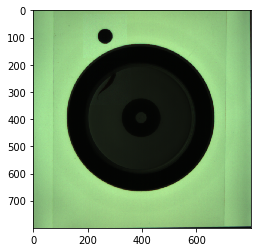

1000 cost time:  0.9294431209564209


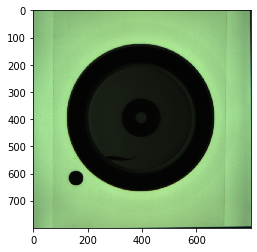

2000 cost time:  0.9299168586730957


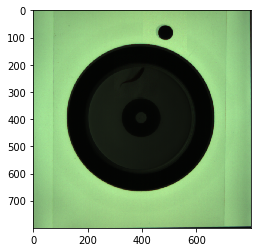

3000 cost time:  0.9373962879180908


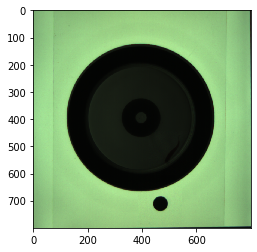

4000 cost time:  1.0322487354278564


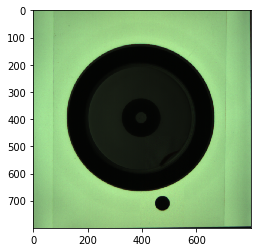

5000 cost time:  0.9318971633911133


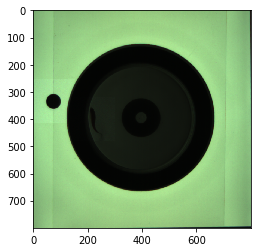

6000 cost time:  0.9309406280517578


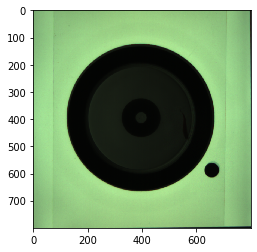

7000 cost time:  0.9321181774139404


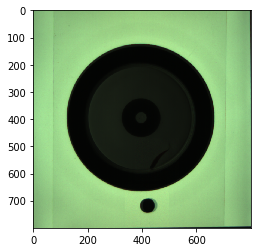

8000 cost time:  0.9298596382141113


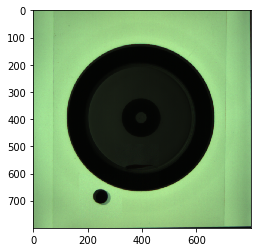

9000 cost time:  0.928267240524292


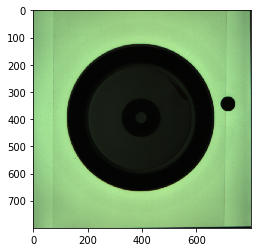

10000 cost time:  0.9288220405578613


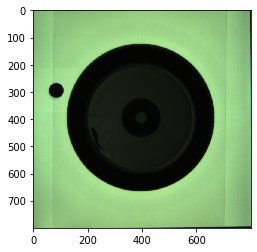

11000 cost time:  0.9368209838867188


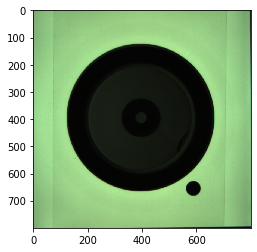

12000 cost time:  0.9330642223358154


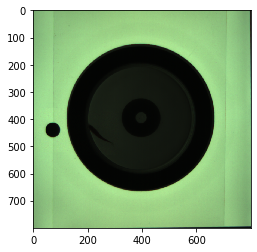

13000 cost time:  0.9359126091003418


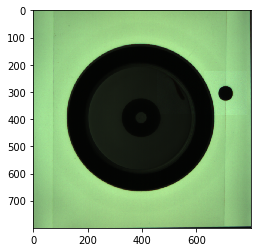

14000 cost time:  0.9320716857910156


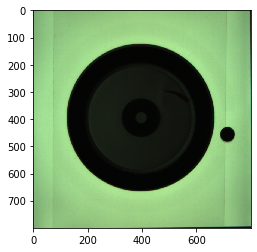

15000 cost time:  0.9294521808624268


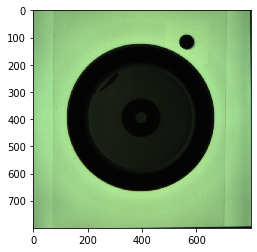

16000 cost time:  0.9301621913909912


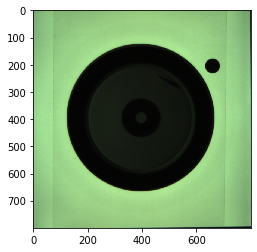

17000 cost time:  0.9316482543945312


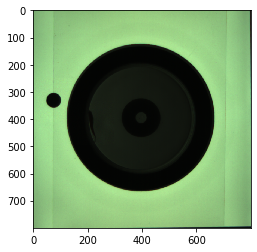

18000 cost time:  0.9336650371551514


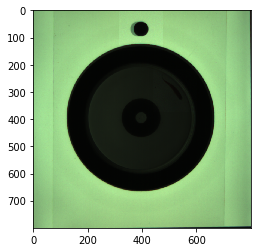

19000 cost time:  0.9383611679077148


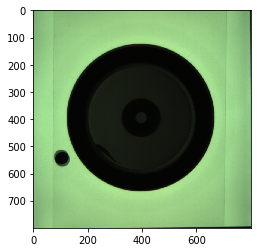

20000 cost time:  0.9305670261383057


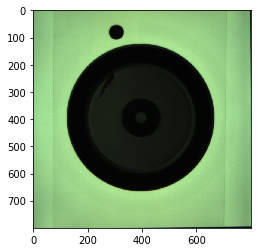

21000 cost time:  0.9284276962280273


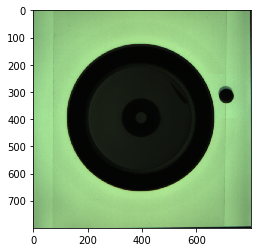

22000 cost time:  1.0322277545928955


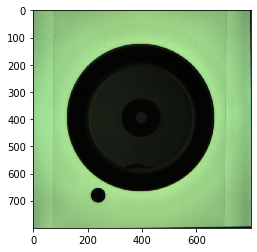

23000 cost time:  0.9366586208343506


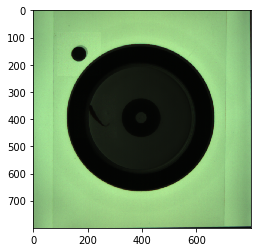

24000 cost time:  0.940420389175415


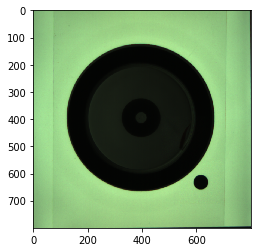

25000 cost time:  0.9435534477233887


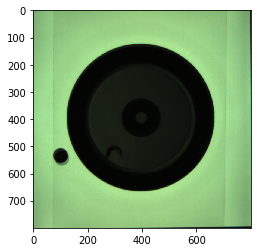

26000 cost time:  0.9401204586029053


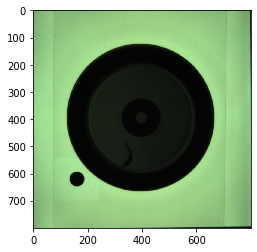

27000 cost time:  0.9823124408721924


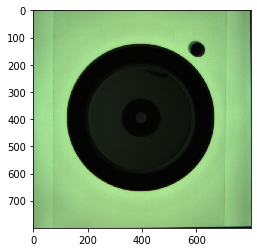

28000 cost time:  0.975541353225708


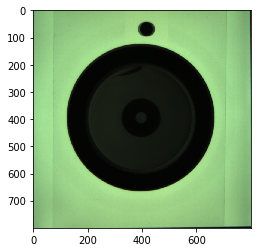

29000 cost time:  0.9749798774719238


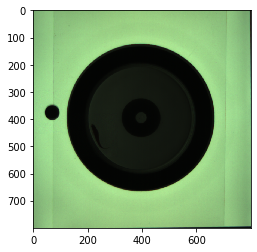

30000 cost time:  0.9452707767486572


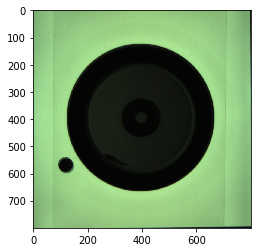

31000 cost time:  0.9441275596618652


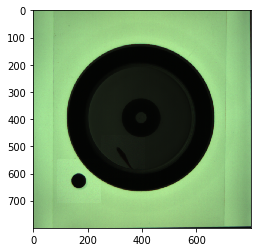

32000 cost time:  0.9298408031463623


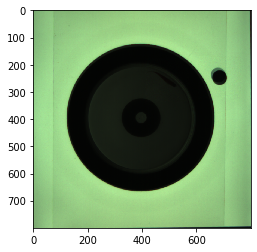

33000 cost time:  0.9282715320587158


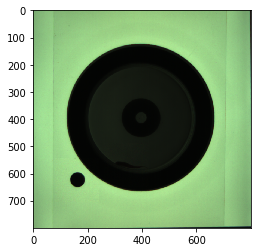

34000 cost time:  0.9386258125305176


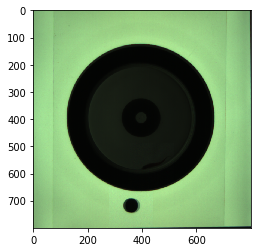

35000 cost time:  0.9669780731201172


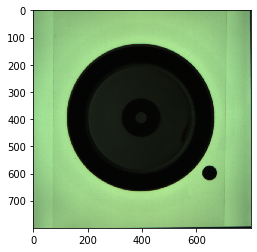

36000 cost time:  0.9353559017181396


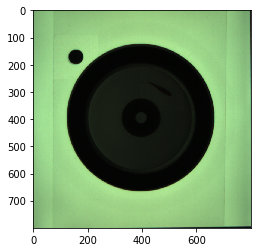

37000 cost time:  0.9319236278533936


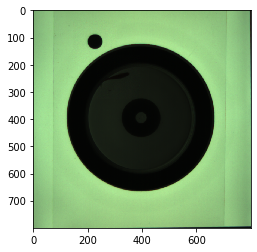

38000 cost time:  0.9403362274169922


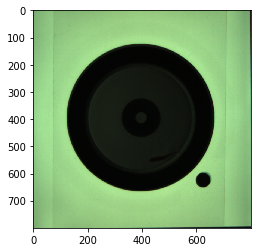

39000 cost time:  0.9518961906433105


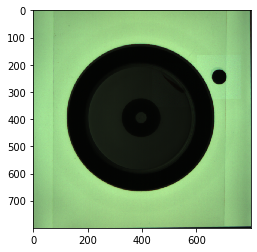

40000 cost time:  1.0274593830108643


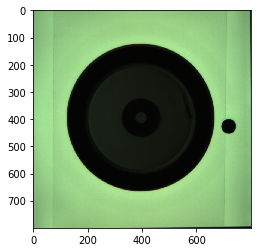

41000 cost time:  0.9386680126190186


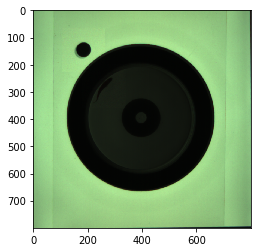

42000 cost time:  1.386385202407837


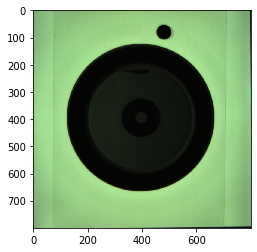

43000 cost time:  1.4571263790130615


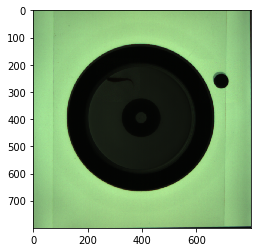

44000 cost time:  1.4278082847595215


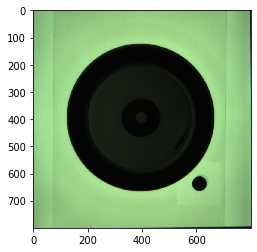

45000 cost time:  1.473707914352417


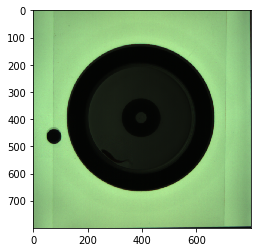

46000 cost time:  1.4498648643493652


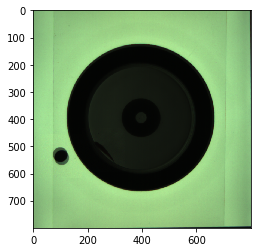

47000 cost time:  1.458035945892334


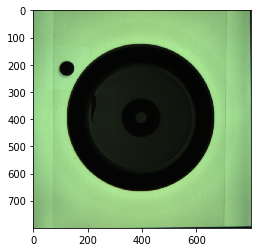

48000 cost time:  1.4675822257995605


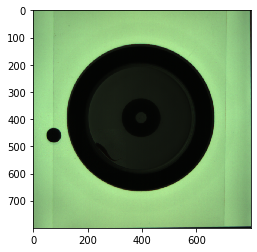

49000 cost time:  1.3928303718566895


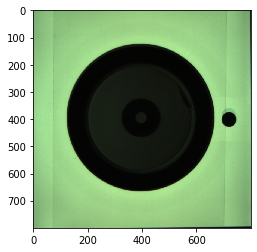

50000 cost time:  1.393110752105713


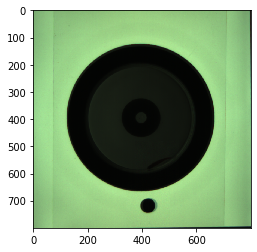

51000 cost time:  1.4010593891143799


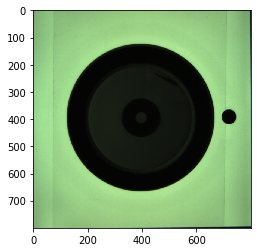

52000 cost time:  1.4121224880218506


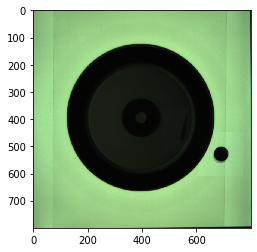

53000 cost time:  1.3907270431518555


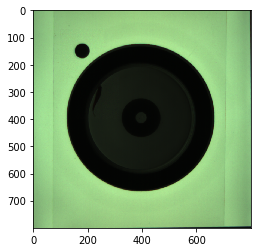

54000 cost time:  1.3897135257720947


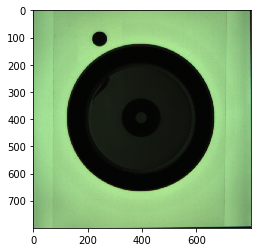

In [22]:
path = "/home/isis0517/Documents/data/compress/HMMTest_01_com"
savepath = "/home/isis0517/Documents/data/compress/HMMTest_01_com"

with open(os.path.join(path,"save.config")) as jsonfile:
    data = json.load(jsonfile)
shape = data["shape"]
size = data["size"]
frame_num = data["frame_num"]
try:
    is_nomo = data["in_nomo"]
except:
    is_nomo = True
    
pos1 = np.load(os.path.join(path,"pos1.npy"))
pos2 = np.load(os.path.join(path,"pos2.npy"))

background = tiff.imread(os.path.join(path, "background.tiff"))
                   
pos1_list = get_flist(os.path.join(path, "pos1"))        
pos2_list = get_flist(os.path.join(path, "pos2"))   
#########################end of pos2########################################                   

start = time.time()

for s in range(frame_num):
    img = tiff.imread(pos1_list[s]) 
    result = glue_img(img,pos1[s],background)
    
    img = tiff.imread(pos2_list[s]) 
    result = glue_img(img,pos2[s],result)
    #plt.imshow(glue_img(img,pos1[0],background)[100:200,200:400,...])
    if s % 1000 == 0:
        print(s,"cost time: ", time.time()-start)
        start = time.time()
        plt.imshow(result)
        plt.show()

    
#video1.release()
#video2.release()